In [18]:
%matplotlib inline
import config
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psycopg2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
surveyRaw = pd.read_csv('Copy of Relationship Survey.csv')
pd.options.display.max_columns = None
surveyRaw.drop(['Respondent ID', 'Collector ID','Start Date',
                'End Date','IP Address','Email Address',
                'First Name','Last Name','Custom Data 1',
                'Unnamed: 11','Unnamed: 13','Unnamed: 18',
                'Unnamed: 22','Unnamed: 26','Unnamed: 30',
                'Unnamed: 34','Unnamed: 38','Unnamed: 41',
                'Unnamed: 44','Unnamed: 47','Unnamed: 50',
                'Indicate if the statement applies to you during the time with your significant other (please check all that apply)',
                'Unnamed: 57','Unnamed: 63','Unnamed: 64',
                'Unnamed: 66','Unnamed: 76','Unnamed: 79'], axis = 1, inplace=True)
# display(surveyRaw)
titles = pd.read_csv('data_titles.csv')
titles

,Education/Knowledge/Street Smarts,partner_education_score,difference_education_score,Financial Choices,partner_financial,difference_financial,Confidence/Self-Esteem,partner_confidence,difference_confidence,Religious/Spiritual Values,partner_religious,difference_religious,Materialism/Superficiality,partner_materialism,difference_materialism,Image/Fashion Sense/Body Modification,partner_image,differnece_image,Occupation/Work Ethic/Self-Discipline,partner_occupation,difference_occupation,"Household Care, Maintenance and Cleanliness",partner_house,difference_house,Communication Style/Manners,partner_communication,difference_communication,Artsy/Creative/Musical,partner_artsy,difference_artsy,Charitable/Philanthropic,partner_charity,difference_charity,Pursuing a Greater Purpose,partner_purpose,difference_purpose,Social Status/Sociability,partner_social,difference_social,"Cultured/Well-traveled/""Woke""",partner_culture,difference_culture,Self-Care/Personal Hygiene/Cleanliness,partner_care,difference_care,Honesty/Dependable/Reliable,partner_honesty,difference_honesty,Family Values,partner_family,difference_family
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
surveyRaw = surveyRaw.dropna(subset=surveyRaw.columns[6:19])
surveyRaw.head()

,How old are you?,What is your gender?,What is your sexual orientation?,What is your relationship status?,How long were you/have you been together?,"How you would describe this relationship? Please answer as honestly as you can. (To be out of someone's league means to be 'better' than them. E.g. ""He/She was out of my league"" = He/She was 'better' than me. E.g. ""I was out of his/her league"" = I was 'better' than him/her)",Which value is/was most important to you in your current relationship or at the end of your relationship. (A value is a lifestyle choice or learned behavior that you respect/admire in a person.),How would you rate yourself for this value in your current relationship or at the end of your relationship.,How would you rate your significant other for this value in your current relationship or at the end of your relationship.,Which value is/was 2nd most important to you in your current relationship or at the end of your relationship.,How would you rate yourself for this value in your current relationship or at the end of your relationship.,How would you rate your significant other for this value in your current relationship or at the end of your relationship.,Which value is/was 3rd most important to you in your current relationship or at the end of your relationship.,How would you rate yourself for this value in your current relationship or at the end of your relationship..1,How would you rate your significant other for this value in your current relationship or at the end of your relationship..1,Which value is/was 4th most important to you in your current relationship or at the end of your relationship.,How would you rate yourself for this value in your current relationship or at the end of your relationship..2,How would you rate your significant other for this value in your current relationship or at the end of your relationship..2,Which value is/was 5th most important to you in your current relationship or at the end of your relationship.,How would you rate yourself for this value in your current relationship or at the end of your relationship..3,How would you rate your significant other for this value in your current relationship or at the end of your relationship..3,"Which trait are/were you MOST drawn to as your ""type"" in your current relationship or at the end of your relationship?(A type is an inherent personality or physical trait that you are drawn to and/or extremely attracted to.)",How would you rate your significant other for this trait in your current relationship or at the end of your relationship.,"Which trait are/were you 2nd most drawn to as your ""type"" in your current relationship or at the end of your relationship?",How would you rate your significant other for this trait in your current relationship or at the end of your relationship..1,"Which trait are/were you 3rd most drawn to as your ""type"" in your current relationship or at the end of your relationship?",How would you rate your significant other for this trait in your current relationship or at the end of your relationship..2,"Which trait are/were you 4th most drawn to as your ""type"" in your current relationship or at the end of your relationship?",How would you rate your significant other for this trait in your current relationship or at the end of your relationship..3,"Which trait are/were you 5th most drawn to as your ""type"" in your current relationship or at the end of your relationship?",How would you rate your significant other for this trait in your current relationship or at the end of your relationship..4,Please indicate your decision-making process when you entered this relationship/situationship,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 65,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 77,Unnamed: 78,Unnamed: 80,Unnamed: 81,Unnamed: 82,Please place the slider where it most accurately 

In [4]:
# iterate thru dataframe
for i, j in surveyRaw.iterrows():
    if i == 0:
        continue

    ls = [0 for x in range(len(titles.columns))]

    for k in range(6,19,3):
        if j[k] in titles.columns:
            ls[titles.columns.get_loc(j[k])] = int(j[k+1])
            ls[titles.columns.get_loc(j[k]) + 1] = int(j[k+2])
            ls[titles.columns.get_loc(j[k]) + 2] = abs((int(j[k+1])+10) - (int(j[k+2])+10))
        
    titles.loc[i-1]=ls
    
titles.reset_index(inplace=True, drop = True)
titles = titles.drop(['difference_education_score',
                      'difference_financial','difference_confidence',
                      'difference_religious','difference_materialism',
                      'differnece_image','difference_occupation',
                      'difference_house','difference_communication',
                      'difference_artsy','difference_charity',
                      'difference_purpose','difference_social',
                      'difference_culture','difference_care',
                      'difference_honesty','difference_family'],axis = 1)
titles

,Education/Knowledge/Street Smarts,partner_education_score,Financial Choices,partner_financial,Confidence/Self-Esteem,partner_confidence,Religious/Spiritual Values,partner_religious,Materialism/Superficiality,partner_materialism,Image/Fashion Sense/Body Modification,partner_image,Occupation/Work Ethic/Self-Discipline,partner_occupation,"Household Care, Maintenance and Cleanliness",partner_house,Communication Style/Manners,partner_communication,Artsy/Creative/Musical,partner_artsy,Charitable/Philanthropic,partner_charity,Pursuing a Greater Purpose,partner_purpose,Social Status/Sociability,partner_social,"Cultured/Well-traveled/""Woke""",partner_culture,Self-Care/Personal Hygiene/Cleanliness,partner_care,Honesty/Dependable/Reliable,partner_honesty,Family Values,partner_family
0,0.0,0.0,0.0,0.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,7.0,4.0,8.0,5.0
1,5.0,6.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0,4.0,7.0
2,8.0,8.0,9.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,10.0,10.0,10.0
3,8.0,5.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.0,8.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,8.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,9.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0,9.0,8.0,0.0,0.0,10.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,5.0,0.0,0.0
74,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,0.0,0.0,7.0,5.0,0.0,0.0
75,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,9.0,10.0,10.0,9.0,10.0,0.0,0.0
76,0.0,0.0,9.0,9.0,9.0,9.0,6.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0


In [5]:
successful = surveyRaw.iloc[:,32:55]
successful = successful.fillna(0)
successful.reset_index(inplace=True, drop = True)

total_list = [0]
for i, column in successful.iterrows():
    if i == 0:
        continue
#     print(len(column))
    total = 0
    for j in range(len(column)):
        if column[j] != 0:
#             print(i,j)
            successful.iloc[i,j] = 1
            total += 1
    total_list.append(total)
#     break
successful['Total'] = total_list
successful

,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 65,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 77,Unnamed: 78,Unnamed: 80,Unnamed: 81,Unnamed: 82,Total
0,I was jealous,She/He was jealous,He/she was manipulative,I was sexually/physically attracted in the beg...,I often felt suffocated,I often wanted more attention/affection than m...,I felt I could do better,I felt I was not good enough for him/her,I had unhealthy coping mechanisms to deal with...,I often felt emotionally drained,I often felt depressed or anxious or angry,I was verbally and/or emotionally abused,I verbally and/or emotionally abused him/her,I often shut down,He/she often shut down,My privacy was often not respected,We had on/off relationship/situationship,I often felt judged by my partner,I felt controlled,I felt trapped/stuck in the relationship/situa...,Often compared my partner to other people or o...,We moved too fast,I often felt my partner was showing off,0
1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,3
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,1,0,0,1,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,9
75,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2
76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
titles

,Education/Knowledge/Street Smarts,partner_education_score,Financial Choices,partner_financial,Confidence/Self-Esteem,partner_confidence,Religious/Spiritual Values,partner_religious,Materialism/Superficiality,partner_materialism,Image/Fashion Sense/Body Modification,partner_image,Occupation/Work Ethic/Self-Discipline,partner_occupation,"Household Care, Maintenance and Cleanliness",partner_house,Communication Style/Manners,partner_communication,Artsy/Creative/Musical,partner_artsy,Charitable/Philanthropic,partner_charity,Pursuing a Greater Purpose,partner_purpose,Social Status/Sociability,partner_social,"Cultured/Well-traveled/""Woke""",partner_culture,Self-Care/Personal Hygiene/Cleanliness,partner_care,Honesty/Dependable/Reliable,partner_honesty,Family Values,partner_family
0,0.0,0.0,0.0,0.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,7.0,4.0,8.0,5.0
1,5.0,6.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0,4.0,7.0
2,8.0,8.0,9.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,10.0,10.0,10.0
3,8.0,5.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.0,8.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,8.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,9.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0,9.0,8.0,0.0,0.0,10.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,5.0,0.0,0.0
74,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,0.0,0.0,7.0,5.0,0.0,0.0
75,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,9.0,10.0,10.0,9.0,10.0,0.0,0.0
76,0.0,0.0,9.0,9.0,9.0,9.0,6.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0


In [7]:
connection = psycopg2.connect(user = config.user,
                              password = config.password,
                              host = config.hostname,
                              port = config.port,
                              database = config.database)

cursor = connection.cursor()

# Print PostgreSQL version
cursor.execute("SELECT * from profiles;")
record = cursor.fetchall()
for x in record:
    print(x)
    break

(None, '25-34', 'Male', 'Heterosexual', 'It was a mutual break up.', '6 months - 1 year', 'I thought we were a good match.', 'Honesty/Dependable/Reliable', 7, 4, 'Confidence/Self-Esteem', 8, 9, 'Family Values', 8, 5, 'Communication Style/Manners', 9, 9, 'Self-Care/Personal Hygiene/Cleanliness', 10, 10, 'Social/Outgoing/Extroverted', 4, 'Generous/Thoughtful/Kind', 6, 'Open-minded/Curious/Free-Spirited', 5, 'Humorous/Witty/Clever', 8, 'Passionate/Driven/Ambitious', 10, 63, 'I consider myself emotionally intelligent', None, None, 'He/she was manipulative', 'We had great sexual chemistry throughout the relationship', None, None, None, None, None, 'I wished for something long-term', None, None, None, 'I often felt emotionally drained', None, 'I was verbally and/or emotionally abused', None, None, None, None, None, None, None, None, None, None, None, None, None, 48, 17, 55, 17, 0, 85, 15, 0, 49, 81, 85, 88)


In [8]:
#closing database connection.
if(connection):
    cursor.close()
    connection.close()
    print("PostgreSQL connection is closed")

PostgreSQL connection is closed


# Machinge learning using multiple linear regression sklearn

In [9]:
# Change X axis to take out the successfull data
X = titles
y = successful.loc[1:,['Total']]
print(X.shape, y.shape)

(78, 34) (78, 1)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.6415376365970977


In [12]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

In [13]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7843569288398188
Testing Score: -1.1591957234538683


In [14]:
print(model.coef_)
print(model.intercept_)
print(X_test)
X_test.shape


[[-4.87104650e-01  4.64124758e-01  4.19560816e-01 -4.94853281e-01
  -2.88165624e-01 -3.92496025e-02 -8.93437447e-01  7.66859160e-01
  -3.33066907e-16 -1.05471187e-15 -1.95568672e+00  1.74481660e+00
  -2.29025612e-01  4.86484157e-02  9.44542908e-02 -1.11917796e-01
  -6.97922012e-01  5.26493634e-01  1.92785217e-01 -2.31438462e-01
  -6.85985755e-01  4.09134721e-01  8.46238917e-01 -9.07514796e-01
  -2.23637143e+00  2.10710866e+00  1.19332021e+00 -1.13488139e+00
   1.99349311e-01 -1.48910313e-01  7.39790378e-01 -7.26324421e-01
   7.33206627e-01 -7.63599936e-01]]
[4.35290728]
    Education/Knowledge/Street Smarts  partner_education_score  \
34                               10.0                     10.0   
10                                8.0                      8.0   
28                               10.0                      9.0   
54                                8.0                     10.0   
53                                9.0                      9.0   
65                         

(20, 34)

Text(0.5, 1.0, 'Residual Plot')

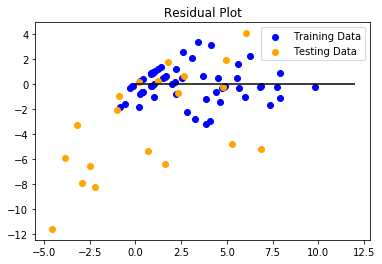

In [15]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [16]:
model.coef_

array([[-4.87104650e-01,  4.64124758e-01,  4.19560816e-01,
        -4.94853281e-01, -2.88165624e-01, -3.92496025e-02,
        -8.93437447e-01,  7.66859160e-01, -3.33066907e-16,
        -1.05471187e-15, -1.95568672e+00,  1.74481660e+00,
        -2.29025612e-01,  4.86484157e-02,  9.44542908e-02,
        -1.11917796e-01, -6.97922012e-01,  5.26493634e-01,
         1.92785217e-01, -2.31438462e-01, -6.85985755e-01,
         4.09134721e-01,  8.46238917e-01, -9.07514796e-01,
        -2.23637143e+00,  2.10710866e+00,  1.19332021e+00,
        -1.13488139e+00,  1.99349311e-01, -1.48910313e-01,
         7.39790378e-01, -7.26324421e-01,  7.33206627e-01,
        -7.63599936e-01]])

In [17]:
model.intercept_

array([4.35290728])

In [34]:
def bootstrap(X,y,target):
    X_ = X
    y_ = y
    while X_.shape[0] < target:
        n = np.random.randint(X.shape[0])
        X_ = X_.append(X.iloc[n,:])
        y_ = y_.append(y.iloc[n])
    return (X_,y_)
bootstrap(pd.DataFrame({0:[1,4,7],
                        1:[2,5,8],
                        2:[3,6,9]}),
          pd.DataFrame({0:[1,2,3]}),15)

(   0  1  2
 0  1  2  3
 1  4  5  6
 2  7  8  9
 2  7  8  9
 2  7  8  9
 2  7  8  9
 2  7  8  9
 2  7  8  9
 0  1  2  3
 0  1  2  3
 2  7  8  9
 1  4  5  6
 2  7  8  9
 2  7  8  9
 1  4  5  6,
    0
 0  1
 1  2
 2  3
 2  3
 2  3
 2  3
 2  3
 2  3
 0  1
 0  1
 2  3
 1  2
 2  3
 2  3
 1  2)

In [38]:
bootstrap(X,y,X.shape[0]*5)[0]

,Education/Knowledge/Street Smarts,partner_education_score,Financial Choices,partner_financial,Confidence/Self-Esteem,partner_confidence,Religious/Spiritual Values,partner_religious,Materialism/Superficiality,partner_materialism,Image/Fashion Sense/Body Modification,partner_image,Occupation/Work Ethic/Self-Discipline,partner_occupation,"Household Care, Maintenance and Cleanliness",partner_house,Communication Style/Manners,partner_communication,Artsy/Creative/Musical,partner_artsy,Charitable/Philanthropic,partner_charity,Pursuing a Greater Purpose,partner_purpose,Social Status/Sociability,partner_social,"Cultured/Well-traveled/""Woke""",partner_culture,Self-Care/Personal Hygiene/Cleanliness,partner_care,Honesty/Dependable/Reliable,partner_honesty,Family Values,partner_family
0,0.0,0.0,0.0,0.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,7.0,4.0,8.0,5.0
1,5.0,6.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0,4.0,7.0
2,8.0,8.0,9.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,10.0,10.0,10.0
3,8.0,5.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.0,8.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,8.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,5.0,8.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0
74,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,0.0,0.0,7.0,5.0,0.0,0.0
44,0.0,0.0,8.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,10.0,10.0,8.0,8.0
36,0.0,0.0,5.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,6.0,8.0,7.0,8.0,6.0
